In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("hdfs311/ut_log_as_sentence.vec", sep='\t', header=None, names=["test_suite", 'klogs_words'])

In [3]:
df['count']=df.groupby("test_suite")['klogs_words'].count()


In [4]:


res=df.groupby(['test_suite'])['klogs_words'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False)
res = res[(res['count']!=0)]
res

,test_suite,count
41,__label__org.apache.hadoop.fs.viewfs.TestViewF...,78
43,__label__org.apache.hadoop.fs.viewfs.TestViewF...,76
42,__label__org.apache.hadoop.fs.viewfs.TestViewF...,75
21,__label__org.apache.hadoop.fs.TestSymlinkHdfsF...,74
40,__label__org.apache.hadoop.fs.viewfs.TestViewF...,72
...,...,...
208,__label__org.apache.hadoop.hdfs.TestWriteBlock...,1
478,__label__org.apache.hadoop.hdfs.server.namenod...,1
479,__label__org.apache.hadoop.hdfs.server.namenod...,1
201,__label__org.apache.hadoop.hdfs.TestSetrepDecr...,1


In [5]:
type(res)

pandas.core.frame.DataFrame

Text(0, 0.5, 'number of testssuites')

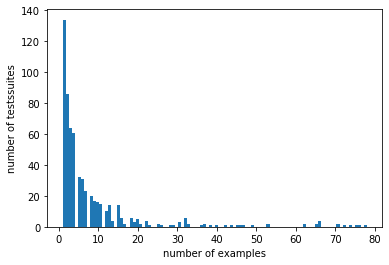

In [6]:
plt = res['count'].plot(kind='hist', bins=100)
plt.set_xlabel("number of examples")
plt.set_ylabel("number of testssuites")

<class 'pandas.core.frame.DataFrame'>


Text(0, 0.5, 'number of testssuites')

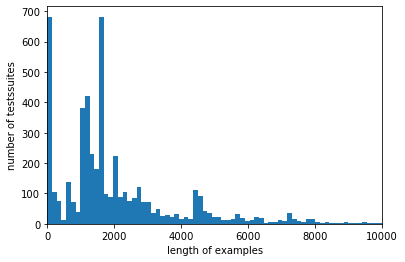

In [7]:
pd.set_option('display.max_rows', None)
print(type(df))
df2=pd.merge(df, res, on="test_suite", how="inner")
df2['len']=df2['klogs_words'].str.len().sort_values()

df3 = df2[df2['len'].notnull()]
plt=df3['len'].sort_values().plot(kind='hist',bins=10000)
plt.set_xlim(0,10000) 
plt.set_xlabel("length of examples")
plt.set_ylabel("number of testssuites")
#print(df['len'])
#
#plt = df3['len'].plot(kind='hist', bins=100)
#plt.set_xlabel("length of examples")
#plt.set_ylabel("number of testssuites")
#
#print(len(df3))

In [8]:
header=['test_suite', "klogs_words"]
df3.to_csv('output.csv', sep='\t', columns = header, index=False)